# Knowledge Graph Explorer - Jupyter Notebook

This notebook helps you explore your knowledge graph dataset interactively.

**Quick Start:**
1. Set the `FILEPATH` variable in the cell below
2. Run all cells (Cell → Run All)
3. Or run cells one by one to explore step-by-step

## Configuration
**👇 CHANGE THIS TO YOUR FILE PATH**

In [2]:
# Set this to your dataset file path
FILEPATH = "train.txt"  # ← CHANGE THIS!

# Example paths:
# FILEPATH = "knowledge_graph.txt"
# FILEPATH = "/home/user/data/my_graph.txt"
# FILEPATH = "C:/Users/username/Documents/graph_data.txt"

## Import Libraries

In [5]:
from collections import Counter, defaultdict
import pandas as pd

# Optional: for visualization
try:
    import matplotlib.pyplot as plt
    MATPLOTLIB_AVAILABLE = True
except ImportError:
    MATPLOTLIB_AVAILABLE = False
    print("Note: matplotlib not available. Install with: pip install matplotlib")

print("✓ Libraries imported")

Matplotlib is building the font cache; this may take a moment.


✓ Libraries imported


## Step 1: Load the Data

In [6]:
def load_graph_data(filepath):
    """Load the knowledge graph from file"""
    edges = []
    
    print(f"Loading data from: {filepath}")
    
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            for line in f:
                line = line.strip()
                if line and not line.startswith('#'):
                    parts = line.split()
                    if len(parts) >= 3:
                        source, relation, target = parts[0], parts[1], parts[2]
                        edges.append((source, relation, target))
        
        print(f"✓ Loaded {len(edges):,} edges")
        return edges
    
    except FileNotFoundError:
        print(f"❌ Error: File '{filepath}' not found!")
        print("Please check the FILEPATH variable above.")
        return None

# Load the data
edges = load_graph_data(FILEPATH)

Loading data from: train.txt
✓ Loaded 13,821 edges


## Step 2: Extract Entities and Relations

In [7]:
if edges:
    # Extract all entities and relations
    entities = set()
    relations = []
    
    for source, relation, target in edges:
        entities.add(source)
        entities.add(target)
        relations.append(relation)
    
    unique_relations = set(relations)
    
    print(f"✓ Found {len(entities):,} unique entities")
    print(f"✓ Found {len(unique_relations):,} unique relation types")

✓ Found 1,316 unique entities
✓ Found 28 unique relation types


## Answer 1: How Many Entities?

In [8]:
if edges:
    print("="*60)
    print(f"TOTAL UNIQUE ENTITIES: {len(entities):,}")
    print("="*60)
    
    # Show sample entities
    print(f"\nSample entities: {', '.join(list(entities)[:10])}")
    if len(entities) > 10:
        print(f"... and {len(entities) - 10:,} more")

TOTAL UNIQUE ENTITIES: 1,316

Sample entities: luis1150, raphael1160, victoria120, claudia1300, elias478, alina173, leonie318, nico888, vanessa1179, marie717
... and 1,306 more


## Answer 2: How Many Relationship Types?

In [9]:
if edges:
    print("="*60)
    print(f"TOTAL RELATIONSHIP TYPES: {len(unique_relations):,}")
    print("="*60)
    
    print("\nAll relationship types:")
    for i, rel in enumerate(sorted(unique_relations), 1):
        print(f"{i:3d}. {rel}")

TOTAL RELATIONSHIP TYPES: 28

All relationship types:
  1. auntOf
  2. boyCousinOf
  3. boyFirstCousinOnceRemovedOf
  4. boySecondCousinOf
  5. brotherOf
  6. daughterOf
  7. fatherOf
  8. girlCousinOf
  9. girlFirstCousinOnceRemovedOf
 10. girlSecondCousinOf
 11. granddaughterOf
 12. grandfatherOf
 13. grandmotherOf
 14. grandsonOf
 15. greatAuntOf
 16. greatGranddaughterOf
 17. greatGrandfatherOf
 18. greatGrandmotherOf
 19. greatGrandsonOf
 20. greatUncleOf
 21. motherOf
 22. nephewOf
 23. nieceOf
 24. secondAuntOf
 25. secondUncleOf
 26. sisterOf
 27. sonOf
 28. uncleOf


## Answer 3: Distribution of Relationships

In [10]:
if edges:
    relation_counts = Counter(relations)
    total = sum(relation_counts.values())
    
    print("="*60)
    print("RELATIONSHIP DISTRIBUTION")
    print("="*60)
    print(f"Total relationships: {total:,}\n")
    
    # Sort by count (most common first)
    for i, (relation, count) in enumerate(relation_counts.most_common(), 1):
        percentage = (count / total) * 100
        
        # Create a simple bar visualization
        bar_length = int(percentage / 2)  # Scale to fit screen
        bar = '█' * bar_length
        
        print(f"{i:3d}. {relation:30s} {count:8,} ({percentage:5.2f}%) {bar}")

RELATIONSHIP DISTRIBUTION
Total relationships: 13,821

  1. grandsonOf                          814 ( 5.89%) ██
  2. grandmotherOf                       813 ( 5.88%) ██
  3. grandfatherOf                       813 ( 5.88%) ██
  4. granddaughterOf                     812 ( 5.88%) ██
  5. motherOf                            733 ( 5.30%) ██
  6. fatherOf                            733 ( 5.30%) ██
  7. sisterOf                            636 ( 4.60%) ██
  8. daughterOf                          628 ( 4.54%) ██
  9. greatGrandsonOf                     624 ( 4.51%) ██
 10. greatGrandmotherOf                  617 ( 4.46%) ██
 11. greatGrandfatherOf                  617 ( 4.46%) ██
 12. greatGranddaughterOf                610 ( 4.41%) ██
 13. sonOf                               600 ( 4.34%) ██
 14. brotherOf                           570 ( 4.12%) ██
 15. auntOf                              556 ( 4.02%) ██
 16. nephewOf                            514 ( 3.72%) █
 17. nieceOf                      

## Visualization: Relationship Distribution Chart

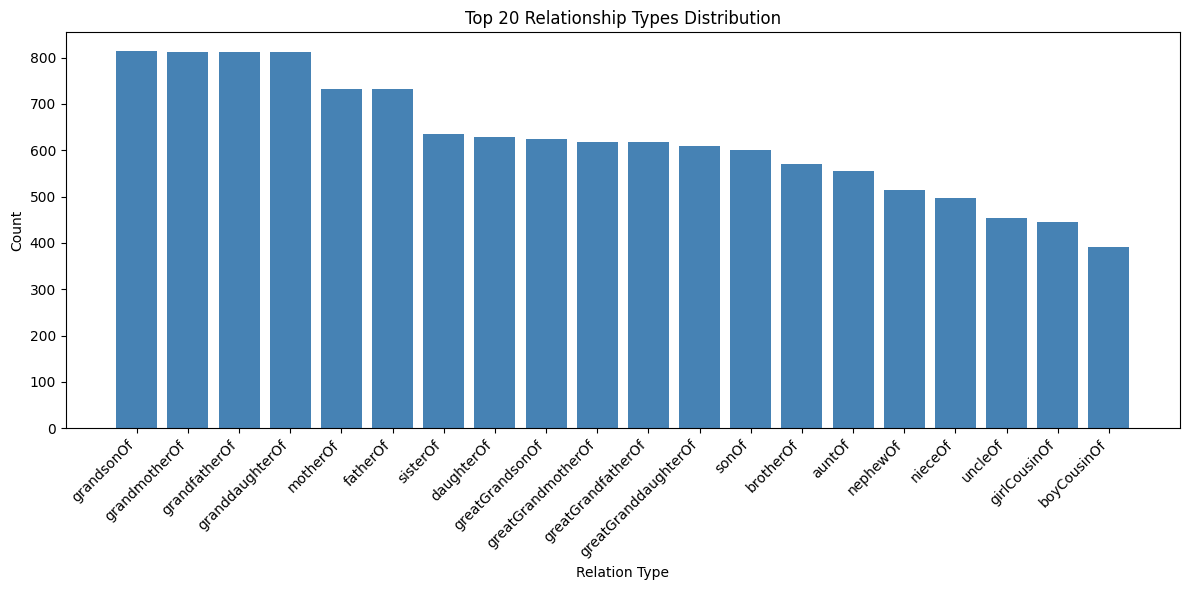

In [11]:
if edges and MATPLOTLIB_AVAILABLE:
    # Create bar chart
    top_n = min(20, len(relation_counts))  # Show top 20 or all if less
    top_relations = relation_counts.most_common(top_n)
    
    labels = [r[0] for r in top_relations]
    counts = [r[1] for r in top_relations]
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(labels)), counts, color='steelblue')
    plt.xlabel('Relation Type')
    plt.ylabel('Count')
    plt.title(f'Top {top_n} Relationship Types Distribution')
    plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
elif edges:
    print("Install matplotlib to see visualizations: pip install matplotlib")

## Additional Analysis: Top Connected Entities

In [12]:
if edges:
    # Calculate degrees
    out_degree = defaultdict(int)
    in_degree = defaultdict(int)
    
    for source, relation, target in edges:
        out_degree[source] += 1
        in_degree[target] += 1
    
    print("="*60)
    print("TOP 10 MOST CONNECTED ENTITIES")
    print("="*60)
    
    # By outgoing connections
    print("\nBy OUTGOING connections (entities that point to many others):")
    top_out = sorted(out_degree.items(), key=lambda x: x[1], reverse=True)[:10]
    for i, (entity, degree) in enumerate(top_out, 1):
        print(f"{i:2d}. {entity:40s} {degree:6,} outgoing")
    
    # By incoming connections
    print("\nBy INCOMING connections (entities pointed to by many others):")
    top_in = sorted(in_degree.items(), key=lambda x: x[1], reverse=True)[:10]
    for i, (entity, degree) in enumerate(top_in, 1):
        print(f"{i:2d}. {entity:40s} {degree:6,} incoming")

TOP 10 MOST CONNECTED ENTITIES

By OUTGOING connections (entities that point to many others):
 1. laura143                                     22 outgoing
 2. oskar133                                     22 outgoing
 3. larissa136                                   22 outgoing
 4. fabian140                                    22 outgoing
 5. dominik1036                                  22 outgoing
 6. olivia1043                                   22 outgoing
 7. magdalena1044                                22 outgoing
 8. oliver1045                                   22 outgoing
 9. lisa1035                                     22 outgoing
10. selina10                                     21 outgoing

By INCOMING connections (entities pointed to by many others):
 1. dominik1036                                  23 incoming
 2. magdalena1044                                23 incoming
 3. oliver1045                                   23 incoming
 4. lisa1035                                     2

## Create DataFrame for Easy Exploration

In [14]:
if edges:
    # Create a pandas DataFrame
    df = pd.DataFrame(edges, columns=['Source', 'Relation', 'Target'])
    
    print("✓ Created DataFrame with all edges")
    print(f"\nDataFrame shape: {df.shape}")
    print("\nFirst 10 rows:")
    display(df.head(20))

✓ Created DataFrame with all edges

DataFrame shape: (13821, 3)

First 10 rows:


,Source,Relation,Target
0,olivia0,sisterOf,selina10
1,olivia0,sisterOf,isabella11
2,olivia0,sisterOf,oskar24
3,olivia0,sisterOf,adam9
4,olivia0,secondAuntOf,lena18
5,olivia0,secondAuntOf,fabian26
6,olivia0,girlCousinOf,leon16
7,olivia0,girlCousinOf,johanna22
8,olivia0,girlCousinOf,jonas23
9,olivia0,daughterOf,katharina1


## Analyze Specific Relation Type
**👇 Change the relation name to explore different types**

In [15]:
if edges:
    # Pick a relation to analyze (change this!)
    RELATION_TO_ANALYZE = relation_counts.most_common(1)[0][0]  # Most common by default
    
    print(f"Analyzing relation: {RELATION_TO_ANALYZE}")
    print("="*60)
    
    # Filter for this relation
    relation_df = df[df['Relation'] == RELATION_TO_ANALYZE]
    
    print(f"\nTotal occurrences: {len(relation_df):,}")
    print(f"Unique sources: {relation_df['Source'].nunique():,}")
    print(f"Unique targets: {relation_df['Target'].nunique():,}")
    
    print(f"\nFirst 10 examples:")
    display(relation_df.head(10))

Analyzing relation: grandsonOf

Total occurrences: 814
Unique sources: 310
Unique targets: 478

First 10 examples:


,Source,Relation,Target
147,leon16,grandsonOf,emma7
148,leon16,grandsonOf,moritz8
232,jonas23,grandsonOf,emma7
233,jonas23,grandsonOf,moritz8
252,oskar24,grandsonOf,ella19
253,oskar24,grandsonOf,david20
254,oskar24,grandsonOf,emma7
255,oskar24,grandsonOf,moritz8
272,fabian26,grandsonOf,paula12
273,fabian26,grandsonOf,vincent21


## Summary Statistics

In [16]:
if edges:
    print("="*60)
    print("COMPLETE SUMMARY")
    print("="*60)
    print(f"\n📊 Your Knowledge Graph:")
    print(f"  • {len(entities):,} unique entities")
    print(f"  • {len(unique_relations):,} relation types")
    print(f"  • {len(edges):,} total relationships")
    print(f"\n🏆 Most common relation:")
    print(f"  • '{relation_counts.most_common(1)[0][0]}'")
    print(f"  • {relation_counts.most_common(1)[0][1]:,} occurrences")
    print(f"  • {(relation_counts.most_common(1)[0][1]/len(edges)*100):.1f}% of all relationships")
    
    if out_degree:
        most_connected = max(out_degree.items(), key=lambda x: x[1])
        print(f"\n🌟 Most connected entity:")
        print(f"  • '{most_connected[0]}'")
        print(f"  • {most_connected[1]:,} outgoing connections")

COMPLETE SUMMARY

📊 Your Knowledge Graph:
  • 1,316 unique entities
  • 28 relation types
  • 13,821 total relationships

🏆 Most common relation:
  • 'grandsonOf'
  • 814 occurrences
  • 5.9% of all relationships

🌟 Most connected entity:
  • 'laura143'
  • 22 outgoing connections


## Interactive Exploration

Now you can use the variables to explore further:

- `df` - DataFrame with all edges
- `entities` - Set of all entities
- `relation_counts` - Counter of relation frequencies
- `out_degree` - Dictionary of out-degrees
- `in_degree` - Dictionary of in-degrees

**Example queries:**

In [17]:
# Example 1: Find all relations for a specific entity
if edges:
    entity_name = list(entities)[0]  # Pick first entity
    print(f"All relationships involving '{entity_name}':")
    display(df[(df['Source'] == entity_name) | (df['Target'] == entity_name)])

All relationships involving 'luis1150':


,Source,Relation,Target
11886,alexander1142,grandsonOf,luis1150
11917,rene1147,sonOf,luis1150
11939,luis1150,fatherOf,rene1147
11940,luis1150,grandfatherOf,alexander1142
11941,luis1150,grandfatherOf,clara1154
11942,luis1150,greatGrandfatherOf,tobias1155
11943,luis1150,greatGrandfatherOf,olivia1134
11981,clara1154,granddaughterOf,luis1150
11995,tobias1155,greatGrandsonOf,luis1150
12016,olivia1134,greatGranddaughterOf,luis1150


In [18]:
# Example 2: Count entities by role
if edges:
    source_entities = set(df['Source'])
    target_entities = set(df['Target'])
    both = source_entities & target_entities
    
    print(f"Entities appearing only as sources: {len(source_entities - target_entities):,}")
    print(f"Entities appearing only as targets: {len(target_entities - source_entities):,}")
    print(f"Entities appearing as both: {len(both):,}")

Entities appearing only as sources: 13
Entities appearing only as targets: 0
Entities appearing as both: 1,303


In [19]:
# Example 3: Get all relation types sorted alphabetically
if edges:
    print("All relation types (alphabetically):")
    for rel in sorted(unique_relations):
        print(f"  • {rel}")

All relation types (alphabetically):
  • auntOf
  • boyCousinOf
  • boyFirstCousinOnceRemovedOf
  • boySecondCousinOf
  • brotherOf
  • daughterOf
  • fatherOf
  • girlCousinOf
  • girlFirstCousinOnceRemovedOf
  • girlSecondCousinOf
  • granddaughterOf
  • grandfatherOf
  • grandmotherOf
  • grandsonOf
  • greatAuntOf
  • greatGranddaughterOf
  • greatGrandfatherOf
  • greatGrandmotherOf
  • greatGrandsonOf
  • greatUncleOf
  • motherOf
  • nephewOf
  • nieceOf
  • secondAuntOf
  • secondUncleOf
  • sisterOf
  • sonOf
  • uncleOf


## Export Results

Save your findings to CSV files for further analysis

In [ ]:
if edges:
    # Save all edges to CSV
    df.to_csv('graph_edges.csv', index=False)
    print("✓ Saved edges to 'graph_edges.csv'")
    
    # Save relation counts
    relation_df = pd.DataFrame(relation_counts.most_common(), 
                               columns=['Relation', 'Count'])
    relation_df.to_csv('relation_counts.csv', index=False)
    print("✓ Saved relation counts to 'relation_counts.csv'")
    
    # Save entity degrees
    degree_data = []
    for entity in entities:
        degree_data.append({
            'Entity': entity,
            'OutDegree': out_degree.get(entity, 0),
            'InDegree': in_degree.get(entity, 0),
            'TotalDegree': out_degree.get(entity, 0) + in_degree.get(entity, 0)
        })
    
    degree_df = pd.DataFrame(degree_data)
    degree_df = degree_df.sort_values('TotalDegree', ascending=False)
    degree_df.to_csv('entity_degrees.csv', index=False)
    print("✓ Saved entity degrees to 'entity_degrees.csv'")